# Allele-Specific Expression

RNA sequencing can distinguish transcripts expressed from different copies of genes on homologous chromosomes when single-nucleotide polymorphisms (perhaps silent) distinguish the two alleles. Linkage between these distinctive SNPs and _cis_-regulatory sequences can provide information on regulatory variation within a shared cellular context.

## Null Hypothesis Testing

The null hypothesis in allele-specific expression analysis is that the alleles are expressed equally and so each read is equally likely to be derived from each allele.

Here, we'll take two approaches to get a *p* value for the null hypothesis of equal expression in situations where just 25% of the reads come from one allele and 75% from the other. We'll look at this with just 8 reads, with 32 reads, and then with 100 reads.

### Permutation Testing

First, we'll generate many random sets of data according to the null model and look at the distribution of allele skew in these random data. Our approach to generating random sets of reads is simple: we choose randomly between `0` and `1`, and then count how often we choose `1` by summing the results of this random choice.

The `numpy.random` submodule of the `numpy` module has functions to generate (pseudo-)random numbers. To use this, we'll `import` it and use it like this:

```
import numpy as np
print(np.random.choice(['A', 'C', 'G', 'T']))
print(np.random.choice(['A', 'C', 'G', 'T'], 3))
print(np.random.choice([0, 1], 8))
```

In [10]:
import numpy as np
np.random.choice(['A', 'C', 'G', 'T'], 17)
np.random.choice([0, 1], 50)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0])

The quick trick to *count* how many of our random 0-or-1 choices came up 1 is to sum the vector using the `sum()` function, like this:

```
sum(np.random.choice([0, 1], 8))
```

In [18]:
sum(np.random.choice([0, 1], 100))

51

Now, we'll generate 10,000 random samples of 8 reads each, and tabulate how many random samples have zero, one, ..., eight reads from that sample.

First we'll create an empty counting array with 9 entries for 0 through 8 inclusive
```
allele_counts_8 = [0] * 9
```
Then we'll run a for loop 10,000 times. We don't actually use the loop varible inside the `for` loop, so by convention we'll just call it `_`.
```
for _ in range(0, 10000):
    ...
```

In [21]:
allele_counts_8 = [0] * 9
allele_counts_8
for _ in range(0,10000):
    k = sum(np.random.choice([0, 1], 8))
    allele_counts_8[k] = allele_counts_8[k] + 1
    # print(k, allele_counts_8)
allele_counts_8

[36, 335, 1079, 2211, 2691, 2210, 1118, 285, 35]

Next, we'll plot the distribution by importing the plotting module. We can directly plot our list, we don't need to turn it into a Pandas `Series` first.
```
import matplotlib.pyplot as plt
plt.plot(allele_counts_8)
```

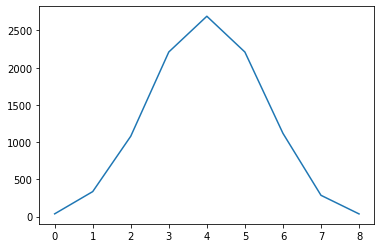

In [22]:
import matplotlib.pyplot as plt
plt.plot(allele_counts_8)

We can use this to ask: in what fraction of random samples do you see 12.5% (one-eighth) or fewer `1` reads? What can you conclude from seeing this kind of skew in a sample of 8 reads?

To do this, we can add up 
```
allele_counts_8[0] + allele_counts_8[1]
```
or, to make it easier to read
```
sum(allele_counts_8[0:2])
```
and then divide by the total number of random trials we generated (which should be 10,000)
```
sum(allele_counts_8)
```

In [49]:
# We have 10k random samples
# allele_counts_8[3] = number of samples with 3 "1"s (and 5 "0"s)
# sum(allele_counts_8) = total number of random samples we made
# probability of exactly 3 "1"s is allele_counts_8[3] / sum(allele_counts_8)
allele_counts_8[3] / sum(allele_counts_8)

# Skewed for ≤3 reads
# 0, 1, 2, or 3
allele_counts_8[0] + allele_counts_8[1] + allele_counts_8[2] + allele_counts_8[3]
allele_counts_8[0:4] = [ allele_counts_8[0], allele_counts_8[1], allele_counts_8[2], allele_counts_8[3] ]
sum(allele_counts_8[0:4])

# probability of ≤3 "1"s is 
sum(allele_counts_8[0:4]) / sum(allele_counts_8)

0.3661

In [28]:
# number of trials with 0 or 1 "1" values
allele_counts_8[0] + allele_counts_8[1]
sum(allele_counts_8[0:2])
# allele_counts_8[0:2]
sum(allele_counts_8)
sum(allele_counts_8[0:2]) / sum(allele_counts_8)

0.0371

What if we wanted to consider a strong skew in *either* direction? That is, we're interested in situations where we had ≤12.5% or ≥87.5% frequence of `1` alleles?

We would need to consider 7 or 8 reads in addition to 0 or 1
```
sum(allele_counts_8[7:9])
```

In [31]:
# 7 or 8 "1" values out of 8 trials
allele_counts_8[7:9]
sum(allele_counts_8[7:9]) / sum(allele_counts_8)

0.032

We can repeat the same analysis, for 24 reads per random sample.

* Make an empty, 25-entry count array
* Loop over 10,000 random trials
    * Generate a random choice of 24 x 0 or 1
    * Sum them up
    * Add the count to the overall tally

In [36]:
allele_counts_24 = [0] * 25
for _ in range(0,100000):
    k = sum(np.random.choice([0,1], 24))
    allele_counts_24[k] = allele_counts_24[k] + 1
allele_counts_24

[0,
 0,
 2,
 7,
 57,
 228,
 841,
 2028,
 4323,
 7732,
 11718,
 15022,
 16128,
 14760,
 11671,
 7862,
 4402,
 2061,
 824,
 247,
 70,
 17,
 0,
 0,
 0]

Now we can test for a similar skew in our 24-read samples -- what are the odds of seeing 3 or fewer reads from one allele and all the rest from the other?

In [35]:
# np.random.choice([0, 1]) = one read, 0 means maternal and 1 means paternal
# np.random.choice([0, 1], 24) = list of 24 values, one per read, 0 means maternal and 1 means paternal for each
# sum(...) = number of paternal reads in 24 reads total
# for loop 10k trials, how often do I see k paternal reads out of 24 total reads
# allele_counts_24[0] = number of times that sum(np.random.choice([0, 1], 24)) == 0 out of 10k trials
# allele_counts_24[1] = number of times that sum(np.random.choice([0, 1], 24)) == 1
sum(allele_counts_24[0:4]) / sum(allele_counts_24)

0.0001

In [38]:
sum(np.random.choice([0,1], 24))

6

What about a stronger skew: just 0 or 1 reads from one allele and all the rest from the other?

## Random Variables

There is probably a small but non-zero odds of getting this strong skew in the 24-read sample -- but we would need to generate a lot of random samples in order to figure out exactly how small. Instead, we can treat the number of reads from the `1` allele as a random variable with a binomial distribution. This isn't always a fair description of biological data, but it's a reasonable starting point here. 

### Binomial Distribution

The scipy package contains a statistics module with a sub-module specific for the binomial distribution. We can get the probability
```
P( k successes out of N trials with probability p of success per trial )
```
using
```
binom.pmf(k, N, p)
```
"pmf" here stands for "probability mass function".

For instance, we can ask about exactly 2 "successes" out of 8 "trials" -- think of this as 2 reads from the `1` allele out of 8 reads counted in total. We can also ask abotu exactly 2 reads from the `1` allele out of 32 total.

To start, install the `scipy` package (you should need to do this just once, ever) and import the `binom` sub-module of the `scipy.stats` (in every notebook where you want to use it)

```
import sys
!{sys.executable} -m pip install scipy
```
Then, you can use the `binom.pmf()` function like
```
binom.pmf(2, 8, 0.5)
```

In [39]:
import sys
!{sys.executable} -m pip install scipy

In [44]:
from scipy.stats import binom
# binom.pmf(k = number of heads, N = number of coin flips, p = chance of head)
binom.pmf(0, 24, 0.5)

5.960464477539072e-08

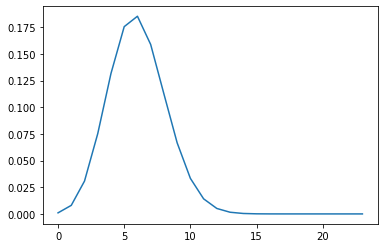

In [52]:
# k = range(0, 24)
# N = 24
# p = 0.5
binom.pmf(range(0, 24), 24, 0.5)
plt.plot(binom.pmf(range(0, 24), 24, 0.25))